# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [5]:
import requests
def download(url, filename):
    # Gửi yêu cầu GET tới URL
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)  
file_name = 'm2_survey_data.csv'

download(file_path, file_name)

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [6]:
pd.set_option('display.max_rows', None)
df = pd.read_csv(file_name)
df.shape

(11398, 85)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [7]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [9]:
df[['CompFreq','ConvertedComp','CompTotal']].head(8)

,CompFreq,ConvertedComp,CompTotal
0,Yearly,61000.0,61000.0
1,Yearly,95179.0,138000.0
2,Yearly,90000.0,90000.0
3,Monthly,455352.0,29000.0
4,Yearly,65277.0,90000.0
5,Monthly,31140.0,9500.0
6,Monthly,41244.0,3000.0
7,Yearly,103000.0,103000.0


C:\Users\ktcop\AppData\Local\Temp\ipykernel_20660\2874524494.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], hist=False,  kde=True, kde_kws={'linewidth': 3}, color='blue')


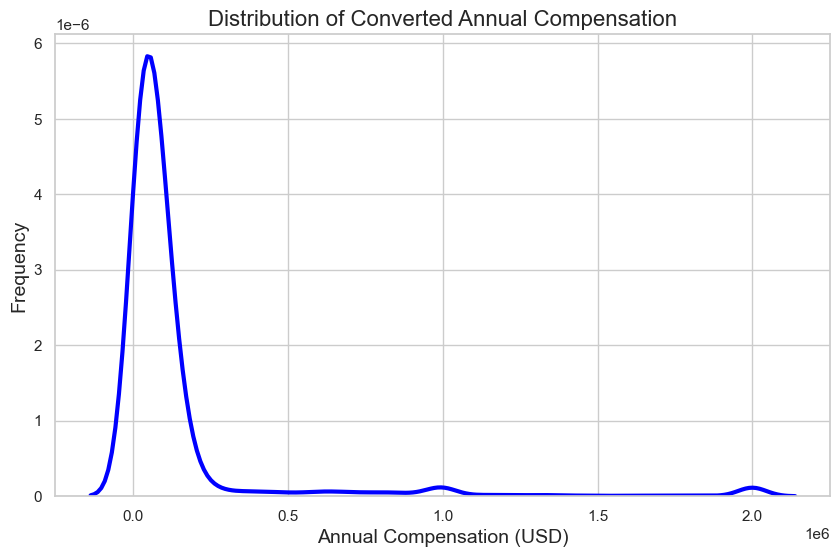

In [10]:
# your code goes here
# Set the style of seaborn
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(10, 6))
sns.distplot(df['ConvertedComp'], hist=False,  kde=True, kde_kws={'linewidth': 3}, color='blue') 

# Add labels and title
plt.title('Distribution of Converted Annual Compensation', fontsize=16)
plt.xlabel('Annual Compensation (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

Plot the histogram for the column `ConvertedComp`.


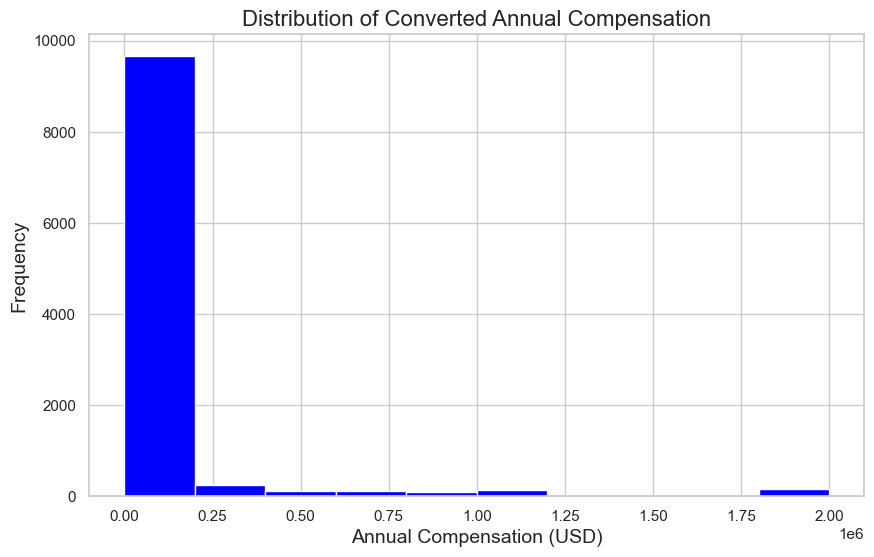

In [11]:
# your code goes here
# Set the style of seaborn
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'],bins=10, kde=False, alpha=1.0, color='blue')

# Add labels and title
plt.title('Distribution of Converted Annual Compensation', fontsize=16)
plt.xlabel('Annual Compensation (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

What is the median of the column `ConvertedComp`?


In [12]:
# your code goes here
df['ConvertedComp'].median()


57745.0

How many responders identified themselves only as a **Man**?


In [13]:
# your code goes here
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [14]:
# your code goes here
count_woman = df[df['Gender'] == 'Woman']
count_woman['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [18]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [45]:
df['Age'].median()

29.0

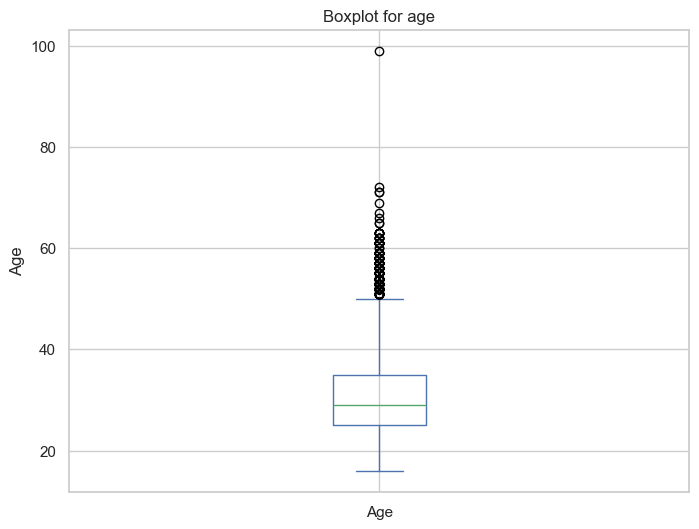

In [23]:
plt.figure(figsize=(8, 6))
df['Age'].plot(kind='box', figsize=(8, 6))
plt.title('Boxplot for age')
plt.ylabel('Age')
plt.show()

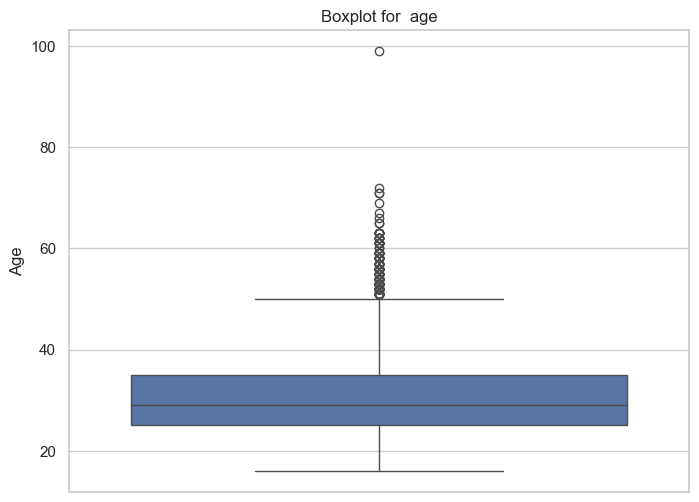

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Age', data=df)  # Chỉ định y là cột Age
plt.title('Boxplot for  age')
plt.ylabel('Age')
plt.show()

Plot a histogram of the column `Age`.


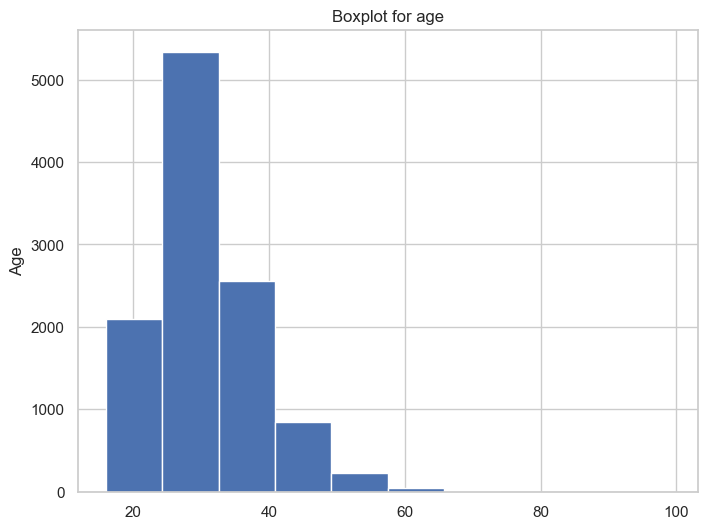

In [24]:
# your code goes here
plt.figure(figsize=(8, 6))
df['Age'].plot(kind='hist', figsize=(8, 6))
plt.title('Boxplot for age')
plt.ylabel('Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


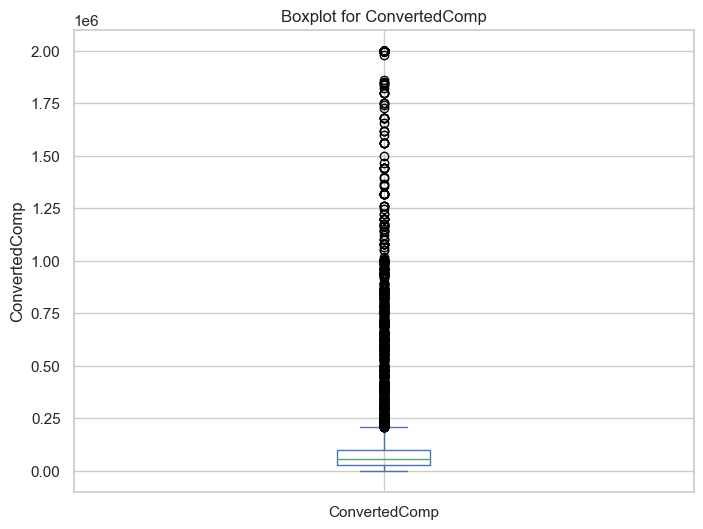

In [26]:
# your code goes here
plt.figure(figsize=(8, 6))
df['ConvertedComp'].plot(kind='box', figsize=(8, 6))
plt.title('Boxplot for ConvertedComp')
plt.ylabel('ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [27]:
# your code goes here
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [30]:
# Tính Q1 và Q3
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Tính IQR
IQR = Q3 - Q1
IQR

73132.0

Find out the upper and lower bounds.


In [31]:
# your code goes here
upper_bounds = Q3 + 1.5 * IQR
print('Upper Bounds :', upper_bounds)
lower_bounds = Q1 - 1.5*IQR
print('Lower Bounds :', lower_bounds)

Upper Bounds : 209698.0
Lower Bounds : -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [33]:
# your code goes here
outlier =[]
for x in df['ConvertedComp']:
  if ((x > upper_bounds) or (x < lower_bounds)):
    outlier.append(x)
print('Outlier in the ConvertedComp column is', len(outlier))

Outlier in the ConvertedComp column is 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [37]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bounds) & (df['ConvertedComp'] <= upper_bounds)]

# Display the new DataFrame
print("New DataFrame without outliers:")
print(df_no_outliers['ConvertedComp'].describe())

New DataFrame without outliers:
count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64


In [46]:
df_no_outliers['ConvertedComp'].median()

52704.0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [42]:
# Lọc các cột có kiểu số
numerical_cols = df.select_dtypes(include=['number'])

# Tính ma trận tương quan
correlation_matrix = numerical_cols.corr()

# Lấy tương quan của Age với các cột số khác
age_correlation = correlation_matrix['Age']

# Hiển thị kết quả
print("Tương quan của Age với các cột số khác:")
print(age_correlation)

Tương quan của Age với các cột số khác:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64
